# <center> École des Ponts ParisTech</center>
## <center> SPH pour l'hydraulique </center>
### <center> Projet SPH GMM 2021</center>
#### <center> Parois mobiles  </center>
<center> Ruben Persicot & Yohan Lanier </center>


<center> Encadrants : Rémi Carmigniani et Damien Violeau </center>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
from src.spyh import *
from src.checkTD3 import *
from src.sphvar import *
from src.plotParticles import *
from src.state import *
from src.contrib import *
from src.analytical_solutions import *
from src.solidStuffManagement import *

In [2]:
#FLUID PARAMETERS 
e = 0.5 #half width in meters
U = 1 # Upper bound velocity
Re = 1 # Reynolds number
#FLUID PARAMETERS
rhoF = 1000
mu = rhoF*U*e/Re #(Pa.s)
grav = np.array([0.0,-9.81])#np.array([0.0,-9.81])#np.array([0.0,0.0]) #m.s-2#OTHER FLUID PARAMETERS
c0 = 10*U
gamma = 7
B = rhoF*c0**2/gamma 
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF


In [3]:
#GEOMETRY
Lx = 2
Ly = 2
lx = 0.5
ly=1
#PARTICLES & SPACES PARAMETERS : 
dr = ly/20
h = smthfc*dr
m=dr*dr*rhoF
lspace = 2*h
#SOLID PARAMETERS
ls = 0.4
ws = 0.2
rhoS = 500
ms = dr*dr*rhoS 
#COMPUTATION DOMAIN : 
xOrigin = -nBound*dr
yOrigin = -nBound*dr
xSize = Lx+2*nBound*dr
ySize = Ly+2*nBound*dr
xMax = xOrigin+xSize
yMax = yOrigin+ySize
#INIT SPACES & PART:
posSpace,neibSpace,partSpace,listNeibSpace = \
init_spaces(xOrigin,yOrigin,xSize,ySize,lspace,dr)
part = init_particles()

In [4]:
#INIT PART:
#% COMPLETE HERE
part = addBox(part,[Lx,Ly/2],FLUID,dr,rhoF)
part = addBox(part,[-nBound*dr,-nBound*dr,Lx+2*nBound*dr,nBound*dr],BOUND,dr,rhoF)
part = addBox(part,[-nBound*dr,0,nBound*dr,Ly],BOUND,dr,rhoF)
part = addBox(part,[Lx,0,nBound*dr,Ly],BOUND,dr,rhoF)
numberOfNonSolidParticles = len(part)
part = addBox(part,[(Lx-ws)/2, (Ly-ls), ws, ls], MOBILESOLID, dr, rhoS)
part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
numberOfSolidPart = len(part)-numberOfNonSolidParticles
# END

<IPython.core.display.Javascript object>


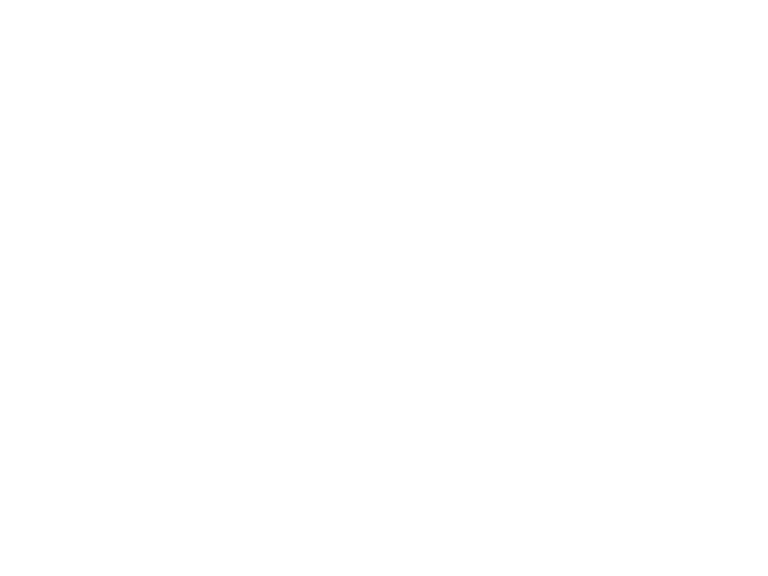

In [5]:
%matplotlib notebook
Umax= 1
tabUx = part[:,VEL[0]]
domain = [xOrigin,xMax,yOrigin,yMax,0,Umax]
plotPropertiesWithBound(part,tabUx,r'$U_x$',domain,dr,1)

In [6]:
plotSpaces(posSpace,'k',lspace,1)
neibSpace[2][neibSpace[2]>-1]
spacesOutline(posSpace[neibSpace[2][neibSpace[2]>-1]],'r',lspace,1)

Initialisation de la pression

In [7]:
def initWaterPressure(part):
    infoTab = part[:,INFO]
    y_i = part[infoTab == FLUID] [:,POS[1]]
    p_i = np.linalg.norm(grav)*rhoF*(Ly/2-y_i)
    rho_i = density(p_i,B,rhoF,gamma)
    part[infoTab == FLUID, RHO] = rho_i
    return part

<IPython.core.display.Javascript object>


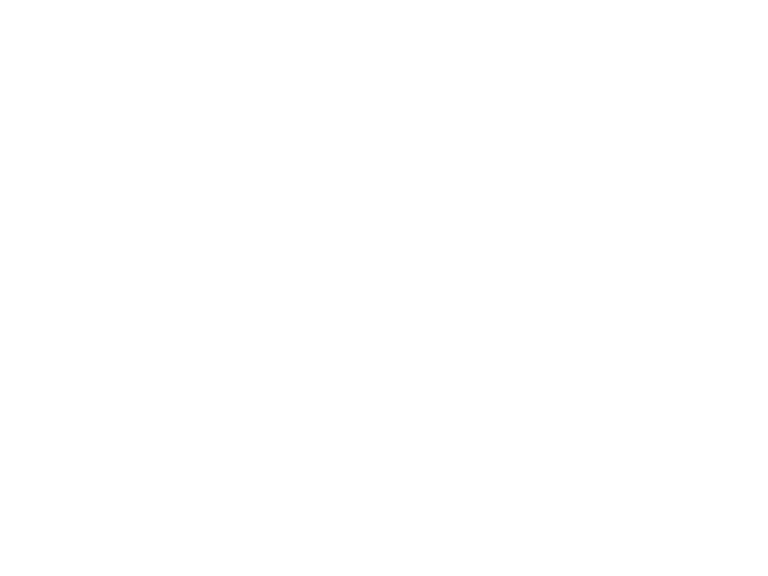

In [8]:
part = initWaterPressure(part)
%matplotlib notebook
Pmax= rhoF*np.linalg.norm(grav)*Ly/2
tabPres = pressure(part[:,RHO],B,rhoF,gamma)
domain = [xOrigin,xMax,yOrigin,yMax,0,Pmax]
plotPropertiesWithBound(part,tabPres,r'Pressure',domain,dr,1)

In [9]:
#Managing the center of mass
#OG = computeCenterOfMass(part, numberOfSolidPart)
infoTab = part[:,INFO]
OG = np.array([1/numberOfSolidPart*np.sum(part[infoTab == MOBILESOLID] [:,POS[0]]),1/numberOfSolidPart*np.sum(part[infoTab == MOBILESOLID] [:,POS[1]])])
print(OG)
V_OG = np.array([0,0])

[1.  1.8]


In [10]:
current_directory = os.getcwd()
case_directory = os.path.join(current_directory, r'Results/Floating_solid_'+time.strftime("%Y%m%d_%H%M%S"))
os.mkdir(case_directory)
data_directory = os.path.join(case_directory,r'Data')
figures_directory = os.path.join(case_directory,r'Figures')
os.mkdir(data_directory)
os.mkdir(figures_directory)

In [11]:
# Here we specify the output frequencies
dt_figure = 0.025*e**2*rhoF/mu
t_print = 0
#final time :
t_end = 3
t=0
it=0
im_count=0

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00e+00 -9.81e-06] [ 0.      -0.00981]
time


<IPython.core.display.Javascript object>


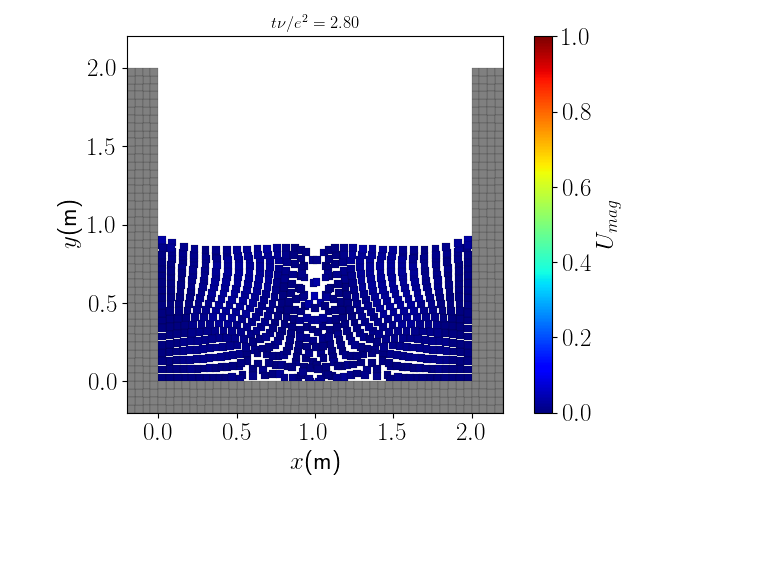

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -1.95911669e-05] [ 0.         -0.01961039]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -2.92672347e-05] [ 0.         -0.02938205]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -3.88586292e-05] [ 0.         -0.03912521]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.0000000e+00 -4.8366654e-05] [ 0.         -0.04884011]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -5.77925126e-05] [ 0.       -0.058527]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -6.71373839e-05] [ 0.         -0.06818612]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -7.64024233e-05] [ 0.        -0.0778177]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -8.55887634e-05] [ 0.         -0.08742199]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -9.46975141e-05] [ 0.         -0.09699921]
time
Force fluid -> solid :
[0. 0.]
dOG, 

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00061524] [ 0.         -0.75146278]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00062057] [ 0.         -0.75947858]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00062588] [ 0.         -0.76747864]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00063115] [ 0.         -0.77546306]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0006364] [ 0.         -0.78343192]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00064161] [ 0.         -0.79138531]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00064679] [ 0.         -0.79932333]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00065195] [ 0.         -0.80724606]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00065707] [ 0.         -0.81515359]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00066216] [ 0.         -0.82304601]
time
Fo

[0. 0.]
dOG, V_OG :
[ 0.         -0.00098395] [ 0.         -1.39118712]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00098739] [ 0.         -1.39811524]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00099082] [ 0.        -1.4050332]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00099424] [ 0.         -1.41194103]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00099764] [ 0.         -1.41883879]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00100102] [ 0.         -1.42572652]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00100439] [ 0.         -1.43260426]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00100775] [ 0.         -1.43947206]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00101109] [ 0.         -1.44632995]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00101442] [ 0.         -1.45317799]
time
Force fluid -> solid :
[0

time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0012268] [ 0.         -1.93521756]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00122928] [ 0.         -1.94142909]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00123175] [ 0.         -1.94763329]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00123422] [ 0.         -1.95383019]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00123668] [ 0.         -1.96001982]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00123912] [ 0.        -1.9662022]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00124156] [ 0.         -1.97237735]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00124399] [ 0.         -1.97854531]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00124642] [ 0.         -1.98470609]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00124883] [ 0.         -1.99085973]
time

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00141086] [ 0.         -2.43932756]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00141275] [ 0.        -2.4449959]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00141463] [ 0.         -2.45065868]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00141651] [ 0.         -2.45631591]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00141838] [ 0.        -2.4619676]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00142024] [ 0.         -2.46761377]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0014221] [ 0.         -2.47325444]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00142396] [ 0.         -2.47888963]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0014258] [ 0.         -2.48451934]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00142765] [ 0.        -2.4901436]
time
Force flui

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155824] [ 0.         -2.91845898]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155973] [ 0.        -2.9236924]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00156121] [ 0.         -2.92892145]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00156269] [ 0.         -2.93414612]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00156416] [ 0.         -2.93936643]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00156563] [ 0.         -2.94458239]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0015671] [ 0.         -2.94979401]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00156856] [ 0.        -2.9550013]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00157002] [ 0.         -2.96020428]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00157147] [ 0.         -2.96540295]
time
Force 

dOG, V_OG :
[-1.94765297e-18 -2.56001438e-03] [-6.15869426e-15 -8.09504883e+00]
time
Force fluid -> solid :
[-2.86792812e-12 -2.58030840e+03]
dOG, V_OG :
[-2.06518248e-18 -2.62891517e-03] [-6.85037016e-15 -8.72031513e+00]
time
Force fluid -> solid :
[-3.67691988e-12 -3.04695003e+03]
dOG, V_OG :
[-2.20363070e-18 -2.69872435e-03] [-7.69296572e-15 -9.42135812e+00]
time
Force fluid -> solid :
[-4.26503277e-12 -3.60493402e+03]
dOG, V_OG :
[-2.33806910e-18 -2.76880963e-03] [-8.61858758e-15 -1.02063828e+01]
time
Force fluid -> solid :
[-5.05895326e-12 -4.27160409e+03]
dOG, V_OG :
[-2.47253253e-18 -2.83848285e-03] [-9.65501677e-15 -1.10840198e+01]
time
Force fluid -> solid :
[-5.70365977e-12 -5.06690720e+03]
dOG, V_OG :
[-2.59167126e-18 -2.90702341e-03] [-1.07546026e-14 -1.20632127e+01]
time
Force fluid -> solid :
[-6.5152328e-12 -6.0137825e+03]
dOG, V_OG :
[-2.69786552e-18 -2.97371841e-03] [-1.19329971e-14 -1.31531289e+01]
time
Force fluid -> solid :
[-8.24940116e-12 -7.13815316e+03]
dOG, V_O

time
Force fluid -> solid :
[ 4.68730832e-10 -1.73449651e+06]
dOG, V_OG :
[-5.98183917e-18 -3.53040402e-03] [-5.96204049e-13 -3.51871909e+02]
time
Force fluid -> solid :
[ 1.93722371e-10 -1.85776321e+06]
dOG, V_OG :
[-5.73065187e-18 -3.52864965e-03] [-5.94710677e-13 -3.66193178e+02]
time
Force fluid -> solid :
[ 4.55656846e-10 -1.99041080e+06]
dOG, V_OG :
[-5.47564577e-18 -3.52740867e-03] [-5.91335244e-13 -3.80937913e+02]
time
Force fluid -> solid :
[ 1.90948413e-09 -2.13384651e+06]
dOG, V_OG :
[-5.14309581e-18 -3.52644972e-03] [-5.77736434e-13 -3.96134656e+02]
time
Force fluid -> solid :
[ 1.93244887e-09 -2.28948309e+06]
dOG, V_OG :
[-4.83300973e-18 -3.52579019e-03] [-5.64500602e-13 -4.11815990e+02]
time
Force fluid -> solid :
[ 9.60881152e-09 -2.45633526e+06]
dOG, V_OG :
[-4.12808754e-18 -3.52530136e-03] [-5.01185040e-13 -4.28001657e+02]
time
Force fluid -> solid :
[-4.72094257e-08 -2.51446011e+06]
dOG, V_OG :
[-6.34525966e-18 -3.51881779e-03] [-8.00539302e-13 -4.43945888e+02]
time
F

Force fluid -> solid :
[ 2.28949375e-07 -1.92069119e+07]
dOG, V_OG :
[ 5.71638529e-18 -5.22083097e-03] [ 1.77388842e-12 -1.62010976e+03]
time
Force fluid -> solid :
[ 6.47664820e-08 -2.00316783e+07]
dOG, V_OG :
[ 6.04794801e-18 -5.21815848e-03] [ 1.93576903e-12 -1.67017798e+03]
time
Force fluid -> solid :
[ 1.52922439e-08 -2.08917709e+07]
dOG, V_OG :
[ 5.97777544e-18 -5.21415235e-03] [ 1.97283790e-12 -1.72082031e+03]
time
Force fluid -> solid :
[-3.31383490e-08 -2.18482595e+07]
dOG, V_OG :
[ 5.57156471e-18 -5.21086095e-03] [ 1.89488820e-12 -1.77221292e+03]
time
Force fluid -> solid :
[-1.00971192e-07 -2.29332552e+07]
dOG, V_OG :
[ 4.75101615e-18 -5.20859012e-03] [ 1.66429674e-12 -1.82458642e+03]
time
Force fluid -> solid :
[-2.56570274e-07 -2.41578529e+07]
dOG, V_OG :
[ 3.03652990e-18 -5.20730207e-03] [ 1.09521541e-12 -1.87816937e+03]
time
Force fluid -> solid :
[-1.19708784e-06 -2.55603219e+07]
dOG, V_OG :
[-3.99754302e-18 -5.20703539e-03] [-1.48419010e-12 -1.93324508e+03]
time
Force 

time
Force fluid -> solid :
[-1.38793257e-06 -7.58591694e+07]
dOG, V_OG :
[-4.76383721e-18 -5.11371820e-03] [-4.16706513e-12 -4.47311608e+03]
time
Force fluid -> solid :
[ 5.22105256e-06 -7.86469748e+07]
dOG, V_OG :
[ 5.99715391e-19 -5.11307459e-03] [ 5.32958293e-13 -4.54391458e+03]
time
Force fluid -> solid :
[ 3.38070095e-07 -7.88600606e+07]
dOG, V_OG :
[ 9.22302398e-19 -5.11109654e-03] [ 8.32565202e-13 -4.61380252e+03]
time
Force fluid -> solid :
[ 1.91372237e-07 -7.92407417e+07]
dOG, V_OG :
[ 1.09030615e-18 -5.10808756e-03] [ 9.99561836e-13 -4.68295016e+03]
time
Force fluid -> solid :
[ 7.87549652e-08 -7.99141846e+07]
dOG, V_OG :
[ 1.14675755e-18 -5.10558714e-03] [ 1.06725889e-12 -4.75164368e+03]
time
Force fluid -> solid :
[ 2.33042101e-08 -8.08022425e+07]
dOG, V_OG :
[ 1.15092150e-18 -5.10354065e-03] [ 1.08699861e-12 -4.82008686e+03]
time
Force fluid -> solid :
[-3.74275260e-08 -8.19835382e+07]
dOG, V_OG :
[ 1.10183597e-18 -5.10193511e-03] [ 1.05574954e-12 -4.88853675e+03]
time
F

Force fluid -> solid :
[-1.04795532e-07 -1.25131325e+08]
dOG, V_OG :
[-1.50501874e-17 -5.06513893e-03] [-2.22918643e-11 -7.50232451e+03]
time
Force fluid -> solid :
[-8.61473382e-08 -1.26354895e+08]
dOG, V_OG :
[-1.49447226e-17 -5.06450802e-03] [-2.23379722e-11 -7.56995246e+03]
time
Force fluid -> solid :
[-2.41707312e-08 -1.27938850e+08]
dOG, V_OG :
[-1.48192432e-17 -5.06409894e-03] [-2.23507930e-11 -7.63781429e+03]
time
Force fluid -> solid :
[ 1.51630957e-07 -1.29994940e+08]
dOG, V_OG :
[-1.46349203e-17 -5.06391834e-03] [-2.22710804e-11 -7.70615280e+03]
time
Force fluid -> solid :
[ 6.12166332e-07 -1.32706691e+08]
dOG, V_OG :
[-1.42973593e-17 -5.06403198e-03] [-2.19521185e-11 -7.77529804e+03]
time
Force fluid -> solid :
[-1.84263336e-05 -1.32014667e+08]
dOG, V_OG :
[-2.03129668e-17 -5.06309727e-03] [-3.14677326e-11 -7.84347225e+03]
time
Force fluid -> solid :
[-2.61469540e-06 -1.36165849e+08]
dOG, V_OG :
[-2.09908605e-17 -5.06320856e-03] [-3.28061337e-11 -7.91317235e+03]
time
Force 

Force fluid -> solid :
[ 8.80780135e-07 -1.80615718e+08]
dOG, V_OG :
[-1.54731736e-17 -5.04802453e-03] [-3.19895601e-11 -1.04363906e+04]
time
Force fluid -> solid :
[ 7.07223080e-06 -1.85879679e+08]
dOG, V_OG :
[-1.40639549e-17 -5.04871646e-03] [-2.92711561e-11 -1.05078385e+04]
time
Force fluid -> solid :
[ 8.99616134e-06 -1.88627368e+08]
dOG, V_OG :
[-1.23299983e-17 -5.04903018e-03] [-2.58365611e-11 -1.05798535e+04]
time
Force fluid -> solid :
[-5.91680873e-08 -1.88717489e+08]
dOG, V_OG :
[-1.22567894e-17 -5.04861527e-03] [-2.58589969e-11 -1.06514130e+04]
time
Force fluid -> solid :
[-1.78508344e-07 -1.89662554e+08]
dOG, V_OG :
[-1.22055941e-17 -5.04811930e-03] [-2.59262277e-11 -1.07228448e+04]
time
Force fluid -> solid :
[-1.33761205e-07 -1.91576645e+08]
dOG, V_OG :
[-1.21473791e-17 -5.04787916e-03] [-2.59762687e-11 -1.07945149e+04]
time
Force fluid -> solid :
[-2.41707312e-08 -1.94362393e+08]
dOG, V_OG :
[-1.20708026e-17 -5.04787585e-03] [-2.59852510e-11 -1.08667439e+04]
time
Force 

Force fluid -> solid :
[-2.31669401e-06 -3.85544412e+08]
dOG, V_OG :
[-8.94384551e-18 -5.05592490e-03] [-2.53830891e-11 -1.43489724e+04]
time
Force fluid -> solid :
[-1.44273508e-06 -3.85569031e+08]
dOG, V_OG :
[-9.01654665e-18 -5.05496420e-03] [-2.57866617e-11 -1.44568266e+04]
time
Force fluid -> solid :
[-8.54095560e-07 -3.87024341e+08]
dOG, V_OG :
[-9.03108062e-18 -5.05426709e-03] [-2.60237804e-11 -1.45642744e+04]
4 particles are deleted because outside computational domain
time
Force fluid -> solid :
[-2.61337846e-07 -3.50445055e+08]
dOG, V_OG :
[-8.98891031e-18 -5.05004800e-03] [-2.60957964e-11 -1.46608454e+04]
time
Force fluid -> solid :
[ 2.07481207e-07 -3.55714358e+08]
dOG, V_OG :
[-8.90676031e-18 -5.04810118e-03] [-2.60390205e-11 -1.47581843e+04]
time
Force fluid -> solid :
[ 8.92374374e-07 -3.62139640e+08]
dOG, V_OG :
[-8.76564309e-18 -5.04829030e-03] [-2.57964371e-11 -1.48566285e+04]
time
Force fluid -> solid :
[ 2.41448288e-06 -3.70260795e+08]
dOG, V_OG :
[-8.48762180e-18 -

Force fluid -> solid :
[ 9.15839337e-07 -2.34966031e+08]
dOG, V_OG :
[-1.05305527e-17 -5.02027172e-03] [-3.80008111e-11 -1.81162759e+04]
time
Force fluid -> solid :
[ 2.37650238e-06 -2.36636283e+08]
dOG, V_OG :
[-1.03550706e-17 -5.02026889e-03] [-3.74754788e-11 -1.81685850e+04]
time
Force fluid -> solid :
[ 1.12336711e-05 -2.39867852e+08]
dOG, V_OG :
[-9.64306991e-18 -5.02039558e-03] [-3.49993881e-11 -1.82214559e+04]
time
Force fluid -> solid :
[-6.94760820e-06 -2.35401629e+08]
dOG, V_OG :
[-1.00346957e-17 -5.02010218e-03] [-3.65263332e-11 -1.82731925e+04]
time
Force fluid -> solid :
[-2.56986823e-06 -2.27156466e+08]
dOG, V_OG :
[-1.01602185e-17 -5.01935361e-03] [-3.70895203e-11 -1.83229739e+04]
time
Force fluid -> solid :
[-1.44921069e-06 -2.20378248e+08]
dOG, V_OG :
[-1.0218561e-17 -5.0185905e-03] [-3.74062343e-11 -1.83711359e+04]
time
Force fluid -> solid :
[-9.08185029e-07 -2.14654407e+08]
dOG, V_OG :
[-1.02452237e-17 -5.01794538e-03] [-3.76041816e-11 -1.84179218e+04]
time
Force fl

dOG, V_OG :
[-5.71491937e-15 -2.94200213e+00] [-3.67274124e-11 -1.89070254e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.75258742e-15 -2.96139363e+00] [-3.67274124e-11 -1.89070269e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.79037018e-15 -2.98084419e+00] [-3.67274124e-11 -1.89070285e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.82824912e-15 -3.00034426e+00] [-3.67274124e-11 -1.89070300e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.86620706e-15 -3.01988501e+00] [-3.67274124e-11 -1.89070316e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.90422684e-15 -3.03945760e+00] [-3.67274124e-11 -1.89070332e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.94229161e-15 -3.05905335e+00] [-3.67274124e-11 -1.89070347e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-5.98038458e-15 -3.07866363e+00] [-3.67274124e-11 -1.89070363e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-6.01849029e-15 -3.09828046e+00] [-3.67274124e-11 -1.890703

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-7.16203806e-15 -3.68698226e+00] [-3.67274124e-11 -1.89070927e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-7.19670966e-15 -3.70483140e+00] [-3.67274124e-11 -1.89070947e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-7.23122076e-15 -3.72259793e+00] [-3.67274124e-11 -1.89070966e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-7.26557544e-15 -3.74028394e+00] [-3.67274124e-11 -1.89070985e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-7.29977879e-15 -3.75789205e+00] [-3.67274124e-11 -1.89071005e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-8.30946808e-15 -4.27768956e+00] [-3.67274124e-11 -1.89071631e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-8.34815374e-15 -4.29760532e+00] [-3.67274124e-11 -1.89071653e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-8.38825648e-15 -4.31825061e+00] [-3.67274124e-11 -1.89071676e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-8.43010862e-15 -4.33979649e+00] [-3.67274124e-11 -1.89071698e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-8.47387437e-15 -4.36232750e+00] [-3.67274124e-11 -1.89071721e+04]
2 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase ma

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-1.21706387e-14 -6.26543253e+00] [-3.67274124e-11 -1.89072349e+04]
1 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-1.24174948e-14 -6.39251493e+00] [-3.67274124e-11 -1.89072382e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-1.26709573e-14 -6.52299836e+00] [-3.67274124e-11 -1.89072416e+04]
3 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-1.28809614e-14 -6.63110951e+00] [-3.67274124e-11 -1.89072450e+04]
1 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG 

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.10656650e-14 -1.08446604e+01] [-3.67274124e-11 -1.89073696e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.12313767e-14 -1.09299725e+01] [-3.67274124e-11 -1.89073753e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.13648028e-14 -1.09986639e+01] [-3.67274124e-11 -1.89073810e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.14893053e-14 -1.10627615e+01] [-3.67274124e-11 -1.89073867e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.16180627e-14 -1.11290496e+01] [-3.67274124e-11 -1.89073925e+04]
1 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase ma

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.08166244e-14 -1.07165518e+01] [-3.67274124e-11 -1.89075429e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.09102513e-14 -1.07647548e+01] [-3.67274124e-11 -1.89075485e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.10122893e-14 -1.08172880e+01] [-3.67274124e-11 -1.89075541e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.11223584e-14 -1.08739556e+01] [-3.67274124e-11 -1.89075598e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.12399542e-14 -1.09344982e+01] [-3.67274124e-11 -1.89075654e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.75377173e-14 -1.41768069e+01] [-3.67274124e-11 -1.89077921e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.77438251e-14 -1.42829197e+01] [-3.67274124e-11 -1.89077995e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.79484919e-14 -1.43882908e+01] [-3.67274124e-11 -1.89078070e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.81409287e-14 -1.44873658e+01] [-3.67274124e-11 -1.89078145e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-2.81986693e-14 -1.45170973e+01] [-3.67274124e-11 -1.89078220e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.16075337e-14 -1.62723225e+01] [-3.67274124e-11 -1.89081599e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.16391639e-14 -1.62886138e+01] [-3.67274124e-11 -1.89081683e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.16695196e-14 -1.63042489e+01] [-3.67274124e-11 -1.89081768e+04]
1 particles are deleted because outside computational domain
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.16986114e-14 -1.63192335e+01] [-3.67274124e-11 -1.89081853e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.17264498e-14 -1.63335726e+01] [-3.67274124e-11 -1.89081937e+04]
ATTENTION : too many neibs in a space... increase ma

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.19880389e-14 -1.64685280e+01] [-3.67274124e-11 -1.89085184e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.19771588e-14 -1.64629340e+01] [-3.67274124e-11 -1.89085269e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.19672165e-14 -1.64578228e+01] [-3.67274124e-11 -1.89085354e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.19582549e-14 -1.64532165e+01] [-3.67274124e-11 -1.89085440e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.19503146e-14 -1.64491360e+01] [-3.67274124e-11 -1.89085525e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]

[0. 0.]
dOG, V_OG :
[-3.22347702e-14 -1.65958768e+01] [-3.67274124e-11 -1.89088865e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.22447282e-14 -1.66010112e+01] [-3.67274124e-11 -1.89088951e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.22552602e-14 -1.66064411e+01] [-3.67274124e-11 -1.89089037e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.22664130e-14 -1.66121906e+01] [-3.67274124e-11 -1.89089123e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.22782357e-14 -1.66182850e+01] [-3.67274124e-11 -1.89089209e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.229077

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.36737951e-14 -1.73370952e+01] [-3.67274124e-11 -1.89092629e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.37338519e-14 -1.73680239e+01] [-3.67274124e-11 -1.89092719e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.37946003e-14 -1.73993088e+01] [-3.67274124e-11 -1.89092809e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.38559823e-14 -1.74309200e+01] [-3.67274124e-11 -1.89092900e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.39179405e-14 -1.74628279e+01] [-3.67274124e-11 -1.89092990e+04]
ATTENTION : too many neibs in a space... increase maxPartInSpace in sphvar.py
time
Force fluid -> solid :
[0. 0.]

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45228126e-14 -1.77746817e+01] [-3.67274124e-11 -1.89097589e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45223574e-14 -1.77744560e+01] [-3.67274124e-11 -1.89097682e+04]
1 particles are deleted because outside computational domain
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45203411e-14 -1.77734265e+01] [-3.67274124e-11 -1.89097774e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45178252e-14 -1.77721398e+01] [-3.67274124e-11 -1.89097866e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45153002e-14 -1.77708484e+01] [-3.67274124e-11 -1.89097958e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45127713e-14 -1.77695551e+01] [-3.67274124e-11 -1.89098050e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45102437e-14 -1.77682623e+01] [-3.67274124e-11 -1.89098143e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.45077225e-14 -1.77669729e+01] [-3.67274124e-11 -1.89098235e+04]
time
Force fluid

dOG, V_OG :
[-3.46767249e-14 -1.78545614e+01] [-3.67274124e-11 -1.89104318e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.46909114e-14 -1.78618746e+01] [-3.67274124e-11 -1.89104411e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47056900e-14 -1.78694927e+01] [-3.67274124e-11 -1.89104503e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47210656e-14 -1.78774181e+01] [-3.67274124e-11 -1.89104596e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47370424e-14 -1.78856531e+01] [-3.67274124e-11 -1.89104689e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47536237e-14 -1.78941995e+01] [-3.67274124e-11 -1.89104782e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47708122e-14 -1.79030584e+01] [-3.67274124e-11 -1.89104875e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.47886095e-14 -1.79122308e+01] [-3.67274124e-11 -1.89104967e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48070166e-14 -1.79217172e+01] [-3.67274124e-11 -1.891050

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48617602e-14 -1.79504743e+01] [-3.67274124e-11 -1.89111069e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.4853335e-14 -1.7946145e+01] [-3.67274124e-11 -1.89111162e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48454975e-14 -1.79421182e+01] [-3.67274124e-11 -1.89111255e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48382336e-14 -1.79383868e+01] [-3.67274124e-11 -1.89111348e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48315287e-14 -1.79349433e+01] [-3.67274124e-11 -1.89111441e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48253684e-14 -1.79317801e+01] [-3.67274124e-11 -1.89111534e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48197374e-14 -1.79288895e+01] [-3.67274124e-11 -1.89111627e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48146209e-14 -1.79262638e+01] [-3.67274124e-11 -1.89111720e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.48100034e-14 -1.79238950e+0

dOG, V_OG :
[-3.49965401e-14 -1.80205118e+01] [-3.67274124e-11 -1.89117772e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50026931e-14 -1.80236890e+01] [-3.67274124e-11 -1.89117865e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50089518e-14 -1.80269207e+01] [-3.67274124e-11 -1.89117959e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50153209e-14 -1.80302092e+01] [-3.67274124e-11 -1.89118052e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50218053e-14 -1.80335571e+01] [-3.67274124e-11 -1.89118146e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50284100e-14 -1.80369669e+01] [-3.67274124e-11 -1.89118240e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50351399e-14 -1.80404412e+01] [-3.67274124e-11 -1.89118333e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50420000e-14 -1.80439826e+01] [-3.67274124e-11 -1.89118427e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.50489955e-14 -1.80475937e+01] [-3.67274124e-11 -1.891185

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.59064965e-14 -1.84897340e+01] [-3.67274124e-11 -1.89124574e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.59257513e-14 -1.84996585e+01] [-3.67274124e-11 -1.89124670e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.59450909e-14 -1.85096267e+01] [-3.67274124e-11 -1.89124766e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.59645084e-14 -1.85196349e+01] [-3.67274124e-11 -1.89124862e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.59839968e-14 -1.85296797e+01] [-3.67274124e-11 -1.89124958e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60035490e-14 -1.85397574e+01] [-3.67274124e-11 -1.89125055e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60231579e-14 -1.85498643e+01] [-3.67274124e-11 -1.89125151e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60428164e-14 -1.85599968e+01] [-3.67274124e-11 -1.89125247e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60625172e-14 -1.85701510e

time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57142437e-14 -1.83914061e+01] [-3.67274124e-11 -1.89131474e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57132839e-14 -1.83909210e+01] [-3.67274124e-11 -1.89131569e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57125187e-14 -1.83905363e+01] [-3.67274124e-11 -1.89131665e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57119480e-14 -1.83902517e+01] [-3.67274124e-11 -1.89131760e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57115714e-14 -1.83900670e+01] [-3.67274124e-11 -1.89131855e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57113886e-14 -1.83899822e+01] [-3.67274124e-11 -1.89131951e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57113992e-14 -1.83899969e+01] [-3.67274124e-11 -1.89132046e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57115857e-14 -1.83901022e+01] [-3.67274124e-11 -1.89132142e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.57119429e-14 -1.8390

time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61011283e-14 -1.85913416e+01] [-3.67274124e-11 -1.89138651e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61134188e-14 -1.85976804e+01] [-3.67274124e-11 -1.89138747e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61258679e-14 -1.86041009e+01] [-3.67274124e-11 -1.89138844e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61384720e-14 -1.86106013e+01] [-3.67274124e-11 -1.89138940e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61512277e-14 -1.86171798e+01] [-3.67274124e-11 -1.89139037e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61641312e-14 -1.86238343e+01] [-3.67274124e-11 -1.89139133e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61771788e-14 -1.86305631e+01] [-3.67274124e-11 -1.89139230e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61903665e-14 -1.86373640e+01] [-3.67274124e-11 -1.89139327e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62036904e-14 -1.8644

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.61067480e-14 -1.85949017e+01] [-3.67274124e-11 -1.89145426e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60990011e-14 -1.85909216e+01] [-3.67274124e-11 -1.89145523e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60914548e-14 -1.85870447e+01] [-3.67274124e-11 -1.89145619e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60841093e-14 -1.85832712e+01] [-3.67274124e-11 -1.89145715e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60769646e-14 -1.85796012e+01] [-3.67274124e-11 -1.89145812e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60700208e-14 -1.85760346e+01] [-3.67274124e-11 -1.89145908e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60632779e-14 -1.85725715e+01] [-3.67274124e-11 -1.89146004e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60567356e-14 -1.85692116e+01] [-3.67274124e-11 -1.89146101e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60503938e-14 -1.85659551e

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60158133e-14 -1.85487398e+01] [-3.67274124e-11 -1.89152251e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60201881e-14 -1.85510023e+01] [-3.67274124e-11 -1.89152347e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60246861e-14 -1.85533283e+01] [-3.67274124e-11 -1.89152444e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60293060e-14 -1.85557171e+01] [-3.67274124e-11 -1.89152540e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60340462e-14 -1.85581678e+01] [-3.67274124e-11 -1.89152636e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60389053e-14 -1.85606798e+01] [-3.67274124e-11 -1.89152732e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60438818e-14 -1.85632522e+01] [-3.67274124e-11 -1.89152829e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60489742e-14 -1.85658843e+01] [-3.67274124e-11 -1.89152925e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.60541810e-14 -1.85685754e

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.6331140e-14 -1.8711856e+01] [-3.67274124e-11 -1.89159507e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63318084e-14 -1.87122099e+01] [-3.67274124e-11 -1.89159604e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63324734e-14 -1.87125620e+01] [-3.67274124e-11 -1.89159701e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63331348e-14 -1.87129122e+01] [-3.67274124e-11 -1.89159798e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63337927e-14 -1.87132607e+01] [-3.67274124e-11 -1.89159895e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63344471e-14 -1.87136073e+01] [-3.67274124e-11 -1.89159992e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63350980e-14 -1.87139521e+01] [-3.67274124e-11 -1.89160089e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63357453e-14 -1.87142951e+01] [-3.67274124e-11 -1.89160186e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.63363890e-14 -1.87146363e+0

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62636419e-14 -1.86778101e+01] [-3.67274124e-11 -1.89166779e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62642762e-14 -1.86781464e+01] [-3.67274124e-11 -1.89166876e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62650487e-14 -1.86785538e+01] [-3.67274124e-11 -1.89166973e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62659588e-14 -1.86790321e+01] [-3.67274124e-11 -1.89167070e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62670061e-14 -1.86795811e+01] [-3.67274124e-11 -1.89167167e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62681819e-14 -1.86801963e+01] [-3.67274124e-11 -1.89167264e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62693462e-14 -1.86808056e+01] [-3.67274124e-11 -1.89167361e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62706411e-14 -1.86814820e+01] [-3.67274124e-11 -1.89167457e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62720658e-14 -1.86822254e

time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62783135e-14 -1.86861136e+01] [-3.67274124e-11 -1.89174340e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62778831e-14 -1.86859015e+01] [-3.67274124e-11 -1.89174437e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62774659e-14 -1.86856962e+01] [-3.67274124e-11 -1.89174534e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62770620e-14 -1.86854977e+01] [-3.67274124e-11 -1.89174631e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62766715e-14 -1.86853062e+01] [-3.67274124e-11 -1.89174728e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62762945e-14 -1.86851215e+01] [-3.67274124e-11 -1.89174825e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62759310e-14 -1.86849439e+01] [-3.67274124e-11 -1.89174921e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62755812e-14 -1.86847733e+01] [-3.67274124e-11 -1.89175018e+04]
time
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[-3.62752452e-14 -1.8684

KeyboardInterrupt: 

In [12]:
%matplotlib notebook
while t<t_end:
    #STEP1 : Calcul de la CFL
    dt = CFLConditions(part[:,VEL],h,c0,grav,rhoF,mu)
    #STEP2 : Interpolation des conditions au bord
    part[:,RHO],part[:,VEL] = interpolateBoundary((part[:,INFO]==BOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP2BIS : Interpolation des conditions au bord sur les mobiles bound
    part[:,RHO], part[:, VEL] = interpolateMobileSolidBoundary((part[:,INFO]==MOBILESOLID),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav, V_OG,shepardMin)
    
    #STEP3 : Calcul des forces et des termes de densité
    part[:,FORCES],part[:,DRHODT] = computeForcesMorris((part[:,INFO]==FLUID),\
                                                 part[:,SPID],\
                                                 part[:,POS],\
                                                 part[:,VEL],\
                                                 part[:,RHO],\
                                                 listNeibSpace,\
                                                 aW,h,m,B,rhoF,gamma,grav,mu)
    #STEP4 : Integration en temps
    part[:,POS],part[:,VEL],part[:,RHO] = integrationStep((part[:,INFO]==FLUID),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                       dt)
    #STEP4BIS : integration en temps des particules du solid
    OG, V_OG = IntegrateCenterOfMassMovement((part[:,INFO]==MOBILESOLID),\
                                            part[:,SPID],\
                                            part[:,POS],\
                                            part[:,VEL],\
                                            part[:,RHO],\
                                            listNeibSpace,\
                                            aW,h,m,ms,B,rhoF,rhoS,gamma,grav,mu,OG,V_OG,dt)

    part[:,POS],part[:,VEL] = MoveSolidParticles((part[:,INFO]==MOBILESOLID),\
                                                part[:,POS],\
                                                part[:,VEL],\
                                                OG,V_OG)
    print("dOG, V_OG :")
    print(OG, V_OG)
    
    #STEP5 : Corriger densité trop basse
    part[:,RHO] = checkDensity(part[:,RHO],rhoMin,rhoMax)
    #STEP6 : Mise à jour des voisins (pas forcément à tous les pas de temps)
    part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
    listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
    print("time")
    t +=dt
    it +=1
    if t>=t_print:
        fig = plt.figure(1)
        plt.clf()
        plt.title(r'$t\nu/e^2 = %2.2f$'%(t*mu/rhoF/e**2))
        velMagn = (part[:,VEL[0]]*part[:,VEL[0]]+part[:,VEL[1]]*part[:,VEL[1]])**.5
        domain = [xOrigin,xMax,yOrigin,yMax,0,1]
        plotPropertiesWithBound(part,velMagn,r'$U_{mag}$',domain,dr,1)
        figname = os.path.join(figures_directory,r'vel_%06d.png'%im_count)
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        
        
        plt.pause(0.01)
        im_count = im_count+1
        t_print +=dt_figure
        